##### 2. In e-commerce the bounce rate is an important indicator of customer engagement. It is defined as the percentage of visitors to a particular website who navigate away from the site after viewing only one page. When comparing the bounce rate of new versus returning customers, what is your hypothesis? To test your hypothesis, create a Python script that loads online_shoppers_intention.csv. Create a boxplot comparing the bounce rate by visitor type, filtering out bounce rates of 0. Then do a statistical comparison to see if there is a significant difference in the bounce rates of new visitors versus returning visitors. What conclusions do you draw from the result? 
##### Conclusion : As we see from the graph below, the bouce rate for returning users is high when compared to new users. This indicates that returning users engagement with the e-commerce platform is dropping or low. This may be because of any reason like user experience, lack of content etc..

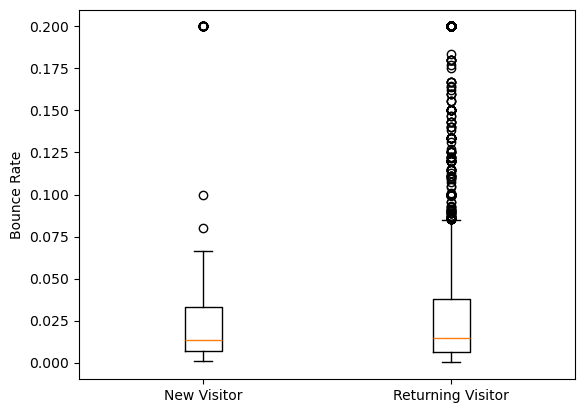

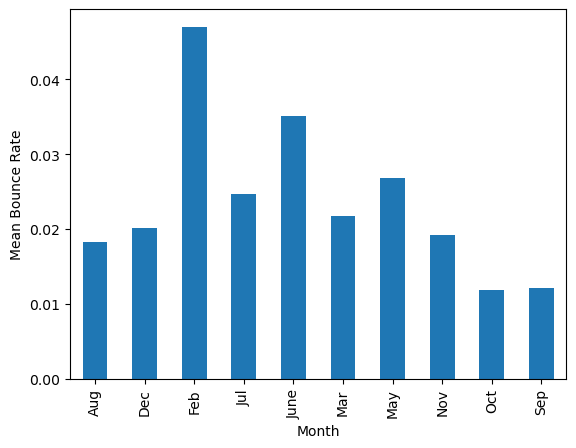

In [11]:
SOURCE_DIRECTORY = "/mnt/research/NOS_mri/CSE801A_Spring2024_A2/online_shoppers_intention.csv"
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv(SOURCE_DIRECTORY)

# Filter out bounce rates of 0
filtered_df = df[df['BounceRates'] != 0]

# Create arrays for bounce rates of new visitors and returning visitors
new_visitor_bounce_rates = filtered_df[filtered_df['VisitorType'] == 'New_Visitor']['BounceRates']
returning_visitor_bounce_rates = filtered_df[filtered_df['VisitorType'] == 'Returning_Visitor']['BounceRates']

# Create boxplot
plt.boxplot([new_visitor_bounce_rates, returning_visitor_bounce_rates])

# Set x-axis labels
plt.xticks([1, 2], ['New Visitor', 'Returning Visitor'])

# Set y-axis label
plt.ylabel('Bounce Rate')

# Show the plot
plt.show()

# Group the data by month and calculate the mean bounce rate
monthly_bounce_rate = df.groupby('Month')['BounceRates'].mean()

# Create a bar plot
monthly_bounce_rate.plot(kind='bar')

# Set x-axis label
plt.xlabel('Month')

# Set y-axis label
plt.ylabel('Mean Bounce Rate')

# Show the plot
plt.show()



##### 3. Import plot_joint.py into your workspace, then load dist2d.csv into a variable X. Use the plot_joint function to scatter plot X and the corresponding projected distributions of the data. Then center X and plot again. Then use PCA from sklearn.decomposition to do a 2 dimensional principal component decomposition of the centered X and plot the result. Finally, use FastICA from sklearn.decomposition to do a 2-dimensional independent component decomposition of the centered X and plot again.

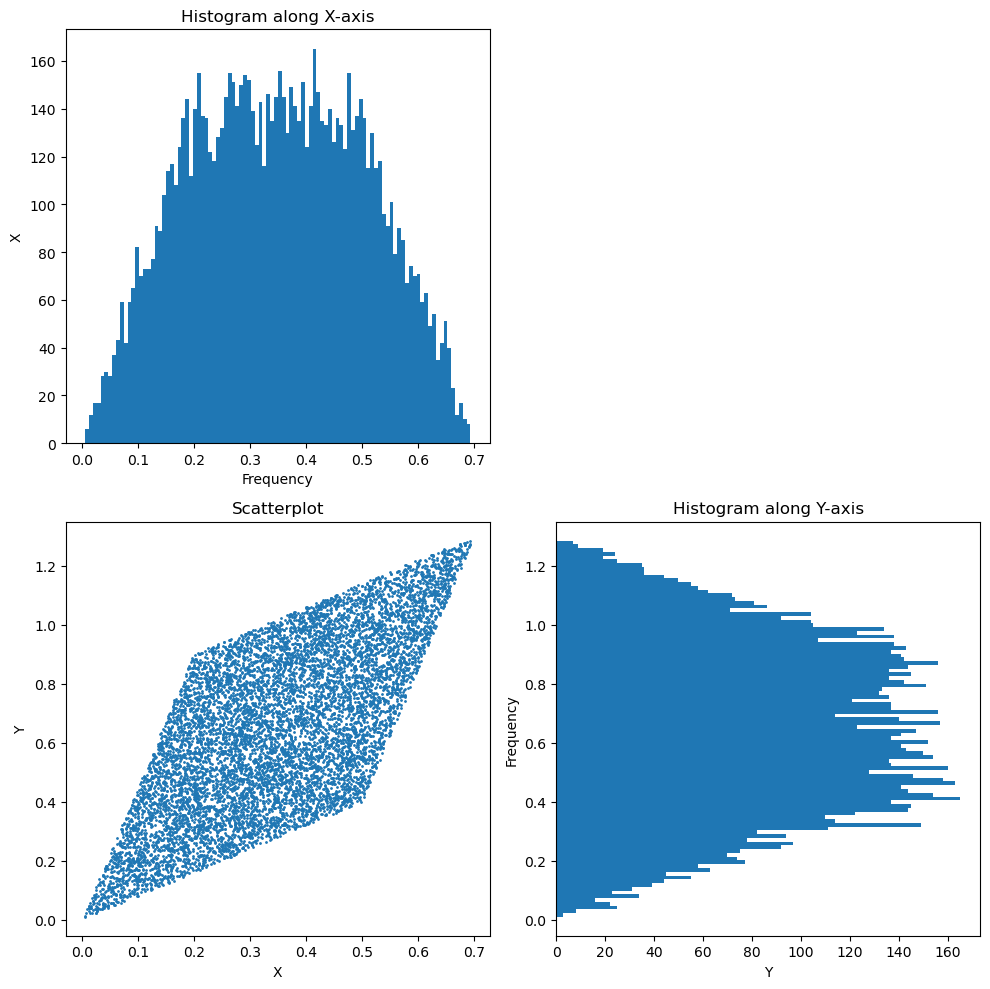

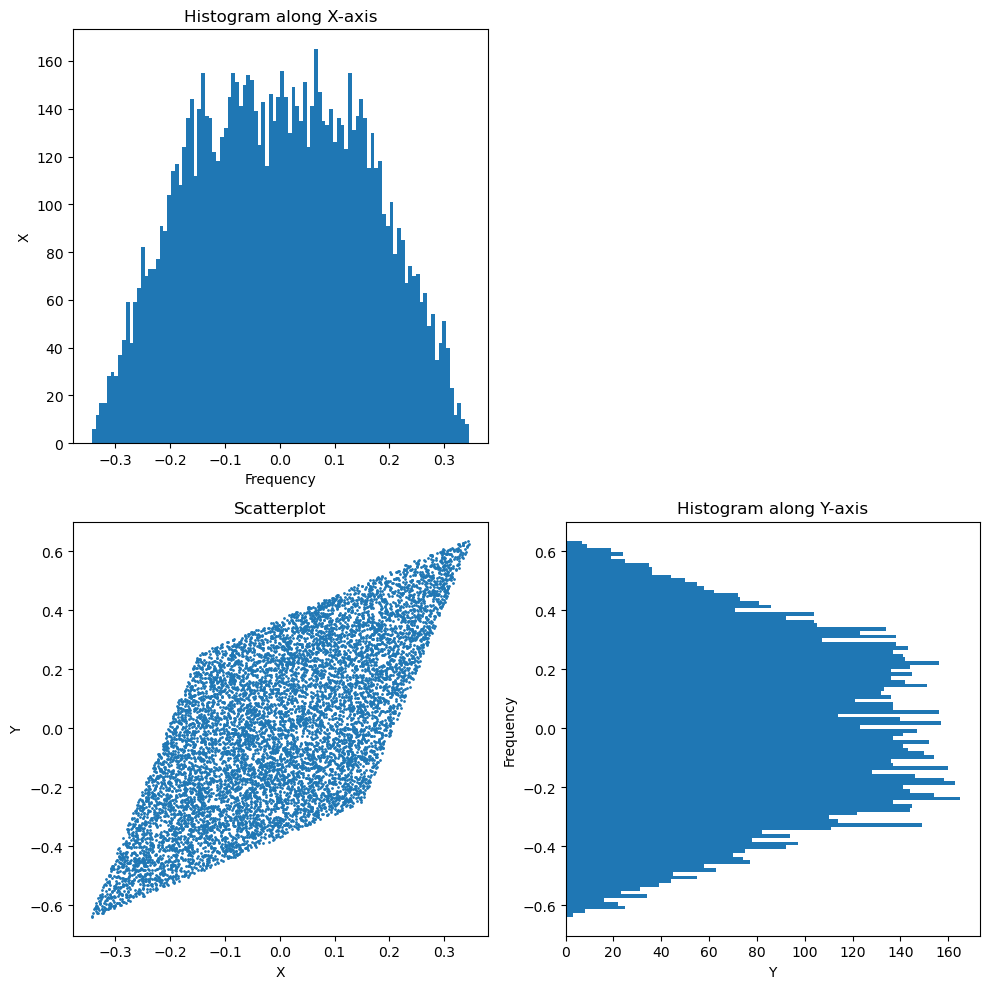

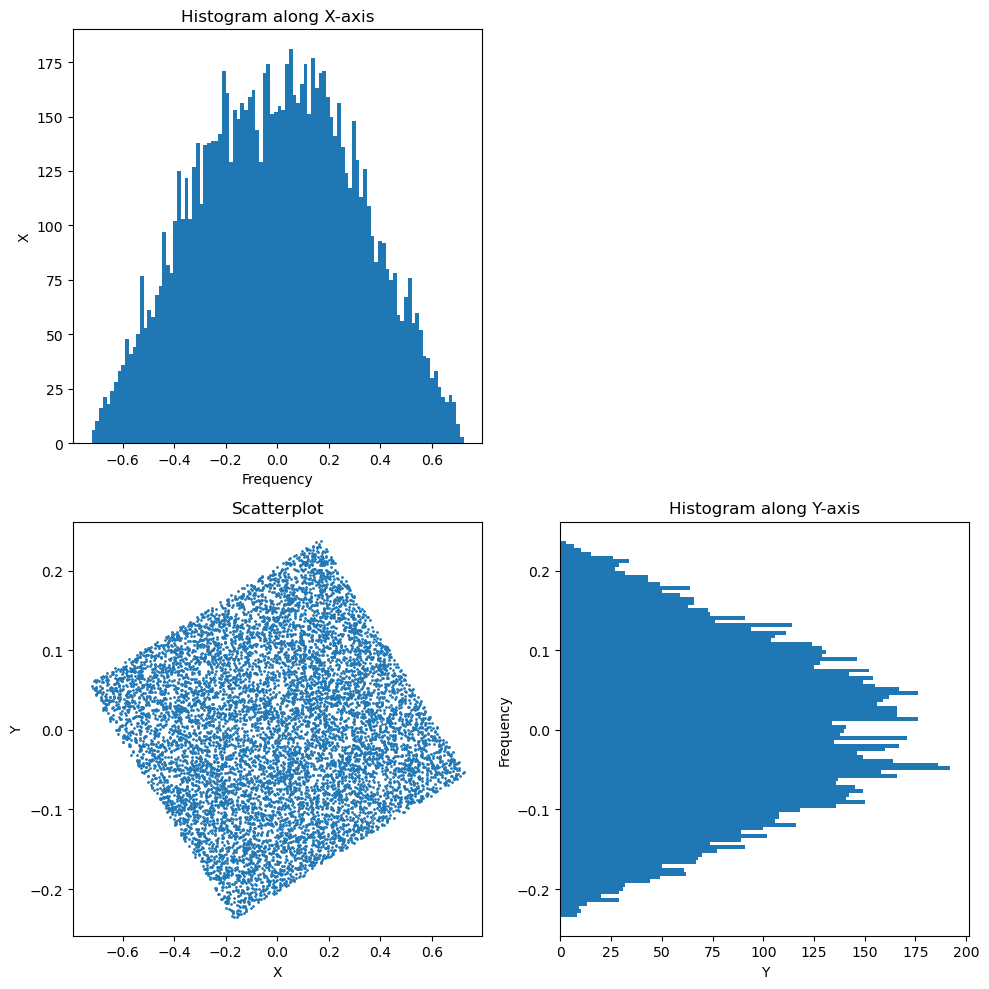

/mnt/home/doggalok/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


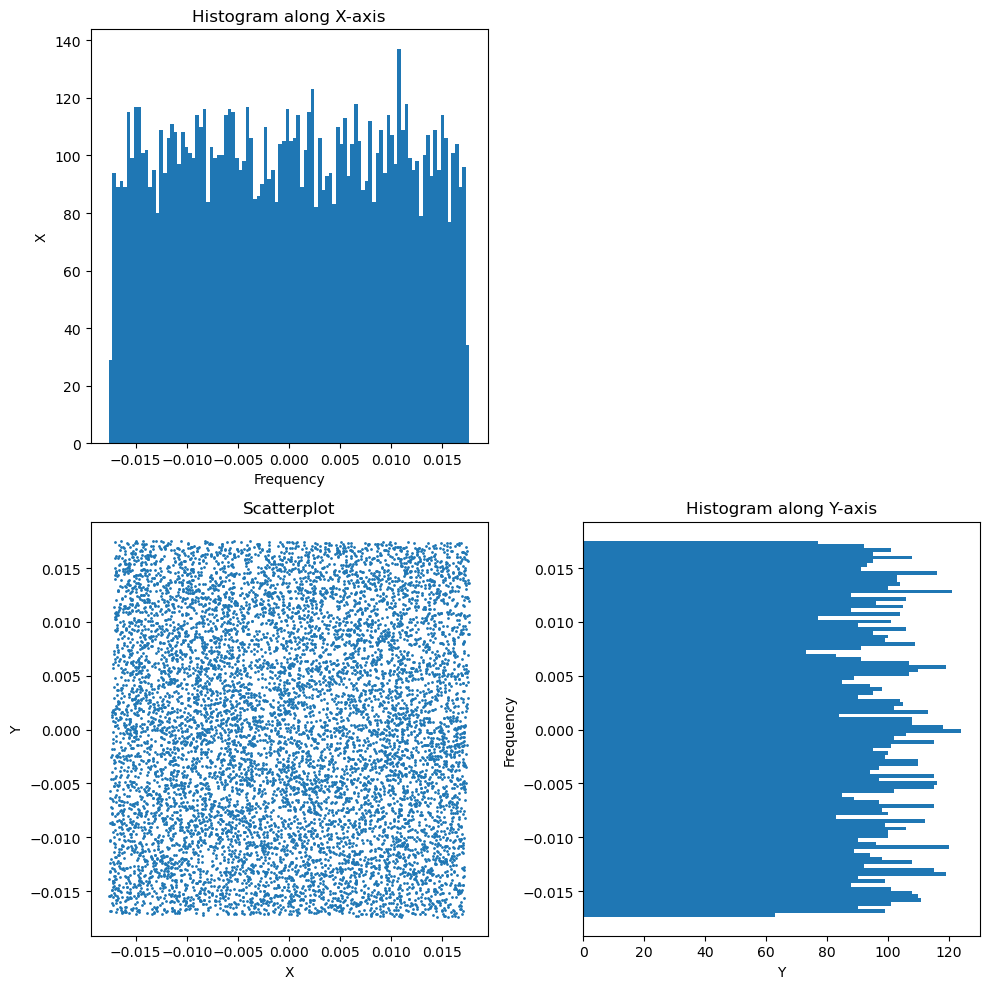

In [8]:
SOURCE_DIRECTORY = "/mnt/research/NOS_mri/CSE801A_Spring2024_A2/"
import sys
sys.path.append(SOURCE_DIRECTORY)

import pandas as pd
from plot_joint import plot_joint
from sklearn.decomposition import PCA, FastICA
import matplotlib.pyplot as plt


# Load dist2d.csv into a variable X 
X = pd.read_csv(SOURCE_DIRECTORY + "dist2d.csv", header = None)

# Scatter plot X and the corresponding projected distributions of the data
plot_joint(X.values)

# Center X
X_centered = X - X.mean()

# Scatter plot centered X
plot_joint(X_centered.values)

# Perform PCA on centered X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

# Scatter plot PCA result
plot_joint(X_pca)

# Perform FastICA on centered X
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X_centered)

# Scatter plot FastICA result
plot_joint(X_ica)


#### 4. At an MSU student party microphones picked up the following mixed signals: mix_{1-5}.wav. The original song recordings got lost, so the only existing copies are these mixed signals. Please help reconstruct the original songs. Copy the wave files into your project folder and listen to them. In a Python script, using wavfile from scipy.io import the copied wave files and use FastICA to unmix the signals. Then re-scale the unmixed signals to a scale from -1 to 1 and use wavfile.write to write out the unmixed signals (make sure they are float32 before writing them out). Listen to the unmixed songs and verify that you were able to reconstruct the 5 originals. Then plot the time courses of the different unmixed songs as your result for the documentation. Make sure the x-axis shows time. 

/mnt/home/doggalok/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/mnt/home/doggalok/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


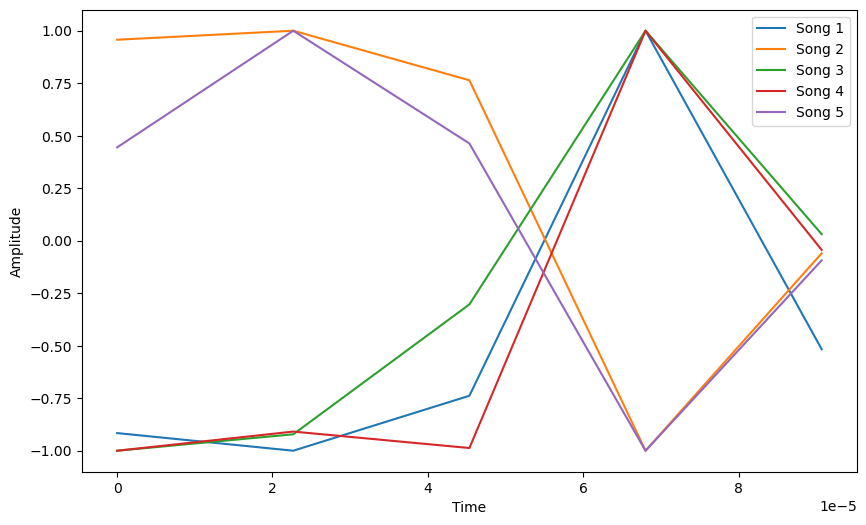

In [9]:
from scipy.io import wavfile
from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt

# Load the wave files
wave_files = ['mix_1.wav', 'mix_2.wav', 'mix_3.wav', 'mix_4.wav', 'mix_5.wav']
wave_data = []
for file in wave_files:
    file = "Waves/" + file
    sample_rate, data = wavfile.read(file)
    wave_data.append(data)

# Convert the wave data to a numpy array
wave_data = np.array(wave_data)

# Apply FastICA to unmix the signals
ica = FastICA(n_components=5)
unmixed_signals = ica.fit_transform(wave_data)

# Rescale the unmixed signals to a scale from -1 to 1
rescaled_signals = []
for signal in unmixed_signals.T:
    rescaled_signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1
    rescaled_signals.append(rescaled_signal)

# Convert the rescaled signals to float32
rescaled_signals = np.array(rescaled_signals, dtype=np.float32)

# Write out the unmixed signals as wave files
for i, signal in enumerate(rescaled_signals):
    wavfile.write(f'unmixed_song{i+1}.wav', sample_rate, signal)

# Plot the time courses of the different unmixed songs
time = np.arange(len(rescaled_signals[0])) / sample_rate
plt.figure(figsize=(10, 6))
for i, signal in enumerate(rescaled_signals):
    plt.plot(time, signal, label=f'Song {i+1}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
